In [1]:
import matplotlib.pyplot as plt
import json, sys, random
from sklearn.metrics import accuracy_score

In [2]:
f = open('./ships-in-satellite-imagery/shipsnet.json')
dataset = json.load(f)
f.close()

print(dataset.keys())

dict_keys(['data', 'labels', 'locations', 'scene_ids'])


In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

#Filtering out images and labels from JSON object
x = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

print(x.shape)

#Reshaping input images in order to feed to CNN
#x = x.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
#y = np_utils.to_categorical(y, num_classes=2)

print(x.shape)
print(y.shape)

#Spilting data into training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
print(x_train.shape)

(4000, 19200)
(4000, 19200)
(4000,)
(3200, 19200)


In [37]:
# Reduce Sample Size for DeBugging
x_train = x_train[0:300000] 
y_train = y_train[0:300000]
x_test = x_test[0:300000] 
y_test = y_test[0:300000]

In [38]:
# Train random forest model
from sklearn.ensemble import RandomForestClassifier

Randomforest_training = RandomForestClassifier().fit(x_train, y_train)

In [39]:
#Checking out accuracy score of Model

from sklearn.metrics import accuracy_score
pred = Randomforest_training.predict(x_test)


print('Accuracy Score for Ships in Satellite Imagery is {}'.format(accuracy_score(y_test, pred)*100))

Accuracy Score for Ships in Satellite Imagery is 93.875


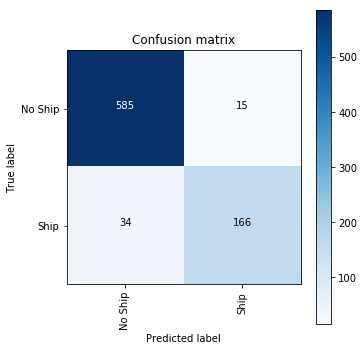

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools  


# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dict_characters = {0: 'No Ship', 1: 'Ship'}
    
# Plot normalized confusion matrix
confusion_mtx = confusion_matrix(y_test, pred)
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values()))

plt.show()

In [57]:
train_sizes = [1, 100, 500,1000, 2000, 2560]

from sklearn.model_selection import learning_curve
#features = ['AT', 'V', 'AP', 'RH']
#target = 'PE'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestClassifier(), X = x_train, y= y_train, train_sizes = train_sizes, cv = 5, scoring = 'neg_mean_squared_error')
#X = electricity[features],
#y = electricity[target], train_sizes = train_sizes, cv = 5, scoring = 'neg_mean_squared_error')
    
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

#print(train_scores)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:811: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


Training scores:

 [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.02       -0.         -0.         -0.         -0.        ]
 [-0.006      -0.01       -0.006      -0.006      -0.002     ]
 [-0.002      -0.01       -0.005      -0.004      -0.009     ]
 [-0.003      -0.0035     -0.0025     -0.0045     -0.005     ]
 [-0.00234375 -0.0015625  -0.003125   -0.0015625  -0.003125  ]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.25      -0.25      -0.25      -0.25      -0.25     ]
 [-0.18125   -0.1640625 -0.1546875 -0.165625  -0.1796875]
 [-0.1078125 -0.1171875 -0.1078125 -0.1       -0.1265625]
 [-0.0875    -0.06875   -0.0921875 -0.0890625 -0.0875   ]
 [-0.071875  -0.0625    -0.071875  -0.06875   -0.0828125]
 [-0.065625  -0.05625   -0.059375  -0.053125  -0.075    ]]


In [58]:
import pandas as pd
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000
100     0.004000
500     0.006000
1000    0.006000
2000    0.003700
2560    0.002344
dtype: float64

 --------------------

Mean validation scores

 1       0.250000
100     0.169063
500     0.111875
1000    0.085000
2000    0.071563
2560    0.061875
dtype: float64


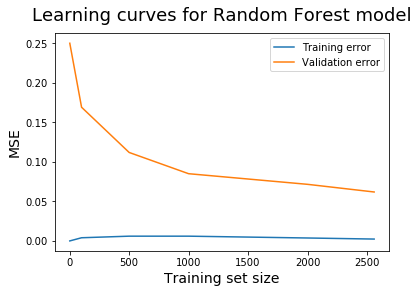

In [59]:
# Plot learning curve

import matplotlib.pyplot as plt

#plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Random Forest model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,40)
plt.show()